In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\Edward\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


'C:\\Users\\Edward\\.matplotlib'

# Bootstrap of the mean
### Contents
    1. Bootstrap of the mean
    2. Visualization

## 1. Bootstrap of the mean

The bootstrap principle is probably easiest to explain by the simple example of computing the bootstrap distribution of the mean. Suppose we have done an experiment and gathered data. We compute the mean $\bar{x}$ of the sample data. Then, we ask ourselves: how precise is our estimate of the population mean? For sure, if we compute $\bar{x}$ from a small sample, we must be more uncertain about how close it is to the true mean then if we compute $\bar{x}$ from a large sample?

One way of quantifying this idea is through bootstrapping the sample. To do so, we first need to compute our initial mean $\bar{x}_text{initial}$. Then, we create a new sample (same size) from the old dataset by sampling from it with replacement. Call this set $S_1$. We can then compute its mean $\bar{x}_1$. This process is repeated $N_\text{boots}$ times, so that we result with $N_\text{boots}$ $\bar{x}_i$s. From these, we can construct an emperical distribution function, that will give us information about the variance of the estimated mean. We can even construct a confidence interval at level $\alpha$ by computing the $\frac{\alpha}{2}$th and $1 - \frac{\alpha}{2}$th percentile of the empirical distribution.

Let's implement this idea.

In [7]:
# generate data
sample = np.round(np.random.rand(20)*10, 2)
initial_mean = np.mean(sample)

# configure bootstrap
def bootstrap(data, p, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    for i in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def confidence_interval(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_idx = int(np.floor(n*l_pval))
        u_idx = int(np.floor(n*u_pval))
        return(simulations[l_idx],simulations[u_idx])
    return simulations, confidence_interval(p)

sim, bounds = bootstrap(sample, p = 0.95)
print("Our bootstrapped confidence interval: (" + str(np.round(bounds[0],2)) + "," + str(np.round(bounds[1],2)) + ")")
print("Our initial mean: " + str(initial_mean))

Our bootstrapped confidence interval: (3.85,6.75)
Our initial mean: 5.2875


## 2. Visualization

Let's visualize the histogram and $\alpha$ confidence level.

C:\Users\Edward\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Edward\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


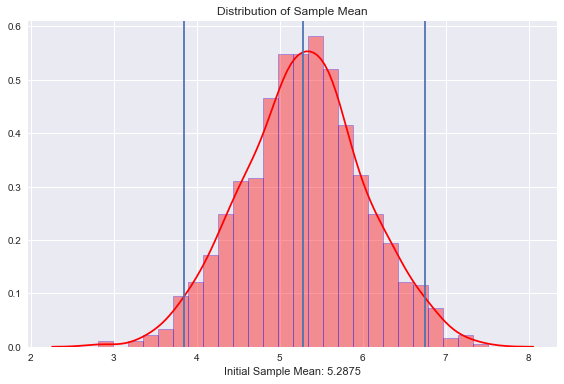

In [8]:
"""
Generate a histogram of the distribution of sample means 
"""

import seaborn as sns
sns.set(style="darkgrid")

sns.distplot(sim, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675))
plt.xlabel("Initial Sample Mean: {}".format(np.mean(sample)))
plt.title("Distribution of Sample Mean")
plt.axvline(x=np.mean(sample))     # vertical line at xbar_init
plt.axvline(x=bounds[0])
plt.axvline(x=bounds[1])
plt.show()